In [1]:
from recovar import (
        RepresentationLearningSingleAutoencoder,
        ClassifierAutocovariance,
        ClassifierAugmentedAutoencoder,
        ClassifierMultipleAutoencoder
    )
from direct_tester import DirectTester

2025-07-02 03:23:37.968812: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 03:23:37.987004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-02 03:23:37.987026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-02 03:23:37.987038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-02 03:23:37.990646: I tensorflow/core/platform/cpu_feature_g

In [2]:
tester = DirectTester()

model_class = RepresentationLearningSingleAutoencoder

# Test with autocovariance classifier
results = tester.test(
    representation_model_class=model_class,
    classifier_wrapper_class=ClassifierAutocovariance,
    test_dataset_path="/home/ege/recovar_data_preprocessed/SUBSAMPLED_0_NE_100.hdf5",
    model_weights_path="checkpoints/best_model.h5",
    batch_size=256
)

2025-07-02 03:23:38.854756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-02 03:23:38.868831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-02 03:23:38.868913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Loading model: representation_learning_autoencoder


2025-07-02 03:23:39.852997: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


Loaded weights from: checkpoints/best_model.h5
Loaded dataset: /home/ege/recovar_data_preprocessed/SUBSAMPLED_0_NE_100.hdf5 with 6144 samples

Testing on: /home/ege/recovar_data_preprocessed/SUBSAMPLED_0_NE_100.hdf5


In [3]:
results

(array([0.01784283, 0.00142342, 0.01083088, ..., 0.01977545, 0.00401771,
        0.00159782], dtype=float32),
 array([1, 0, 1, ..., 1, 0, 1], dtype=int32))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve(scores, labels, title="ROC Curve"):
    """
    Plot ROC curve and calculate AUC
    
    Args:
        scores: Predicted probabilities/scores
        labels: True binary labels (0/1)
        title: Plot title
    """
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
             label='Random classifier')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"AUC Score: {roc_auc:.4f}")
    return roc_auc

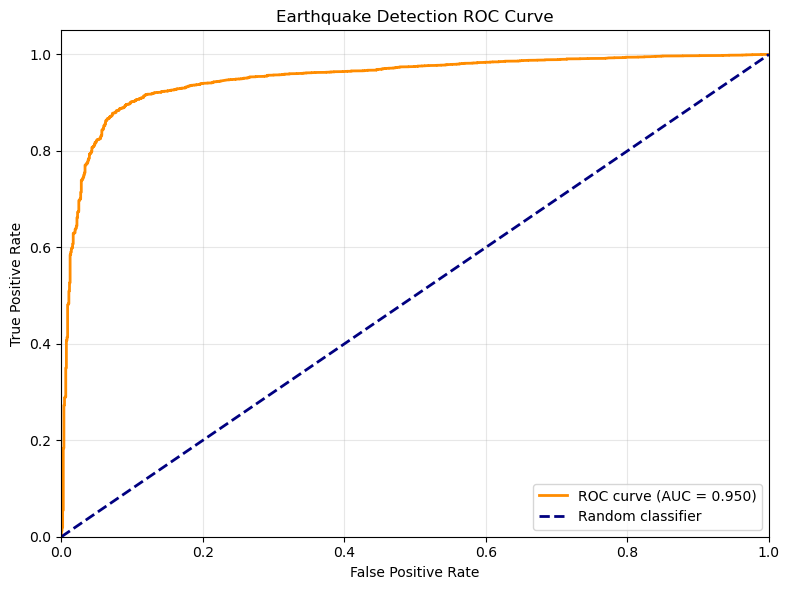

AUC Score: 0.9504


0.9503765955370251

In [ ]:
scores, labels = results 
plot_roc_curve(scores, labels, "Earthquake Detection ROC Curve")